In [ ]:
pip install scikit-learn opencv-python pydub

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from pydub import AudioSegment
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import io
from joblib import dump, load
import cv2
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/labels.csv')

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(df['image_name'], df['text_ocr'], test_size=0.2, random_state=42)

In [ ]:
train_data = train_data.astype(str)


In [ ]:
train_labels = train_labels.astype(str)


In [ ]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(train_data, train_labels)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Function to replace offensive content, blur image, shuffle pixels, and replace speech
def process_meme(meme_text, meme_image, meme_audio):
    # Predict if the text is offensive
    prediction = model.predict([meme_text])[0]

    if prediction == 'offensive':
        # Replace offensive content with a neutral message
        new_text = "This content has been moderated for compliance with community guidelines."

        # Blur the image
        blurred_image = blur_image(meme_image)

        # Shuffle the pixels of the blurred image
        shuffled_image = shuffle_pixels(blurred_image)

        # Replace speech in the audio
        replaced_audio = replace_speech(meme_audio)

        return new_text, shuffled_image, replaced_audio
    else:
        return meme_text, meme_image, meme_audio

In [ ]:
# Function to replace speech in audio
def replace_speech(audio):
    # Convert audio to numpy array
    audio_array = np.array(audio.get_array_of_samples())

    # Replace speech with silence (for simplicity)
    audio_array[:] = 0

    # Convert back to AudioSegment
    replaced_audio = AudioSegment(
        audio_array.tobytes(),
        frame_rate=audio.frame_rate,
        sample_width=audio.sample_width,
        channels=audio.channels
    )

    return replaced_audio

In [31]:
# Example usage
new_meme_text = "THINK POSITIVE"
new_meme_image_path = "/content/image_995.jpeg"
new_meme_audio_path = "/content/im-racist-101soundboards (online-audio-converter.com).wav"

In [32]:
# Load the image and audio
image = cv2.imread(new_meme_image_path)
audio = AudioSegment.from_wav(new_meme_audio_path)


In [ ]:
# Process the meme
processed_text, processed_image, processed_audio = process_meme(new_meme_text, image, audio)

In [ ]:
# Display or save the processed text, image, and audio as needed
print(f'Processed Text: {processed_text}')


Processed Text: THINK POSITIVE


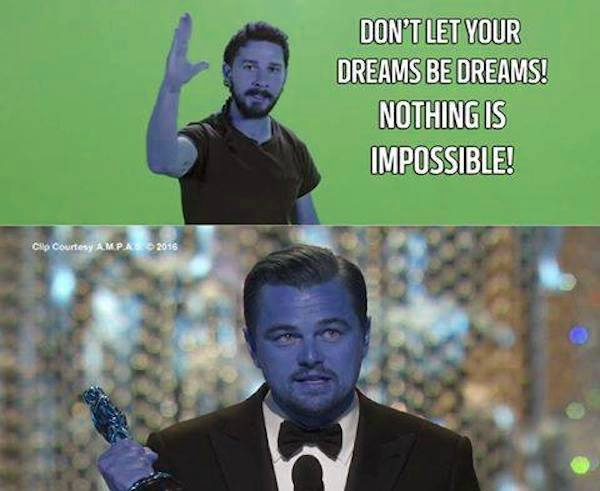

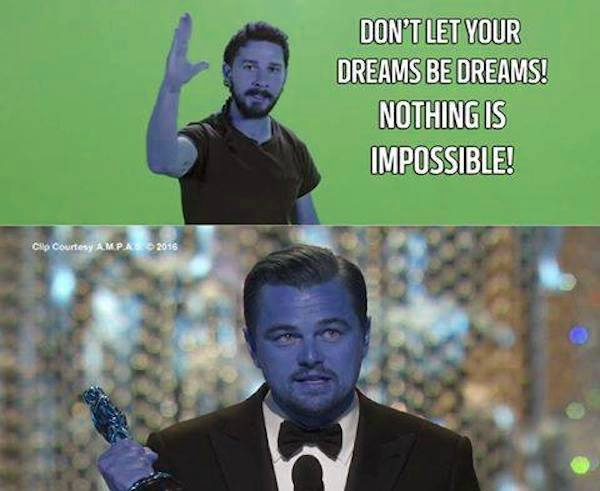

In [35]:
# Load the image
image_path = "/content/image_995.jpeg"
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the original image
    cv2_imshow(image_rgb)

    # Process the meme
    processed_text, processed_image, processed_audio = process_meme(new_meme_text, image, AudioSegment.from_wav(new_meme_audio_path))


    # Display the processed image
    cv2_imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))


In [37]:
 #Save the processed audio to a new file
 processed_audio.export("/content/im-racist-101soundboards (online-audio-converter.com).wav", format="wav")

<_io.BufferedRandom name='/content/im-racist-101soundboards (online-audio-converter.com).wav'>

In [41]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [45]:
def main():
    st.title("Meme Processing App")

    # User input for meme data
    meme_text = st.text_area("Enter Meme Text:")
    meme_image = st.file_uploader("Upload Meme Image:", type=['jpg', 'png', 'jpeg'])
    meme_audio = st.file_uploader("Upload Meme Audio:", type=['wav'])

    # Process the meme
    if st.button("Process Meme"):
        if meme_text and meme_image and meme_audio:
            meme_image = cv2.imdecode(np.fromstring(meme_image.read(), np.uint8), cv2.IMREAD_COLOR)
            meme_audio = AudioSegment.from_wav(meme_audio)

            processed_text, processed_image, processed_audio = process_meme(meme_text, meme_image, meme_audio)

            st.text("Processed Text:")
            st.text(processed_text)

            st.image(processed_image, caption="Processed Image", use_column_width=True)
            st.audio(processed_audio.export(format="wav").read(), format="audio/wav")

    # Download link for the dataset
    st.markdown("### Download Dataset")
    st.markdown("Click the link below to download the dataset.")
    st.markdown("[Dataset](./content/labels.csv)", unsafe_allow_html=True)
